<a href="https://colab.research.google.com/github/SusanLL/Project/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tree Model Building**
1. Plain Decision Tree Classifier / Regressor
2. Random Forest Classifier / Regressor
3. Adaboot Classifier / Regressor
4. XGBoost Classifier / Regressor




Loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [ ]:
url = "https://archive.ics.uci.edu/static/public/17/data.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

In [ ]:
df.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
# count null value
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


In [ ]:
df['Diagnosis'].value_counts()

,count
Diagnosis,
0,357
1,212


 Diagnosis (M = malignant, B = benign)

In [ ]:
df.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# drop the id
df = df.drop('ID', axis=1)

In [ ]:
# Define X ang Y
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

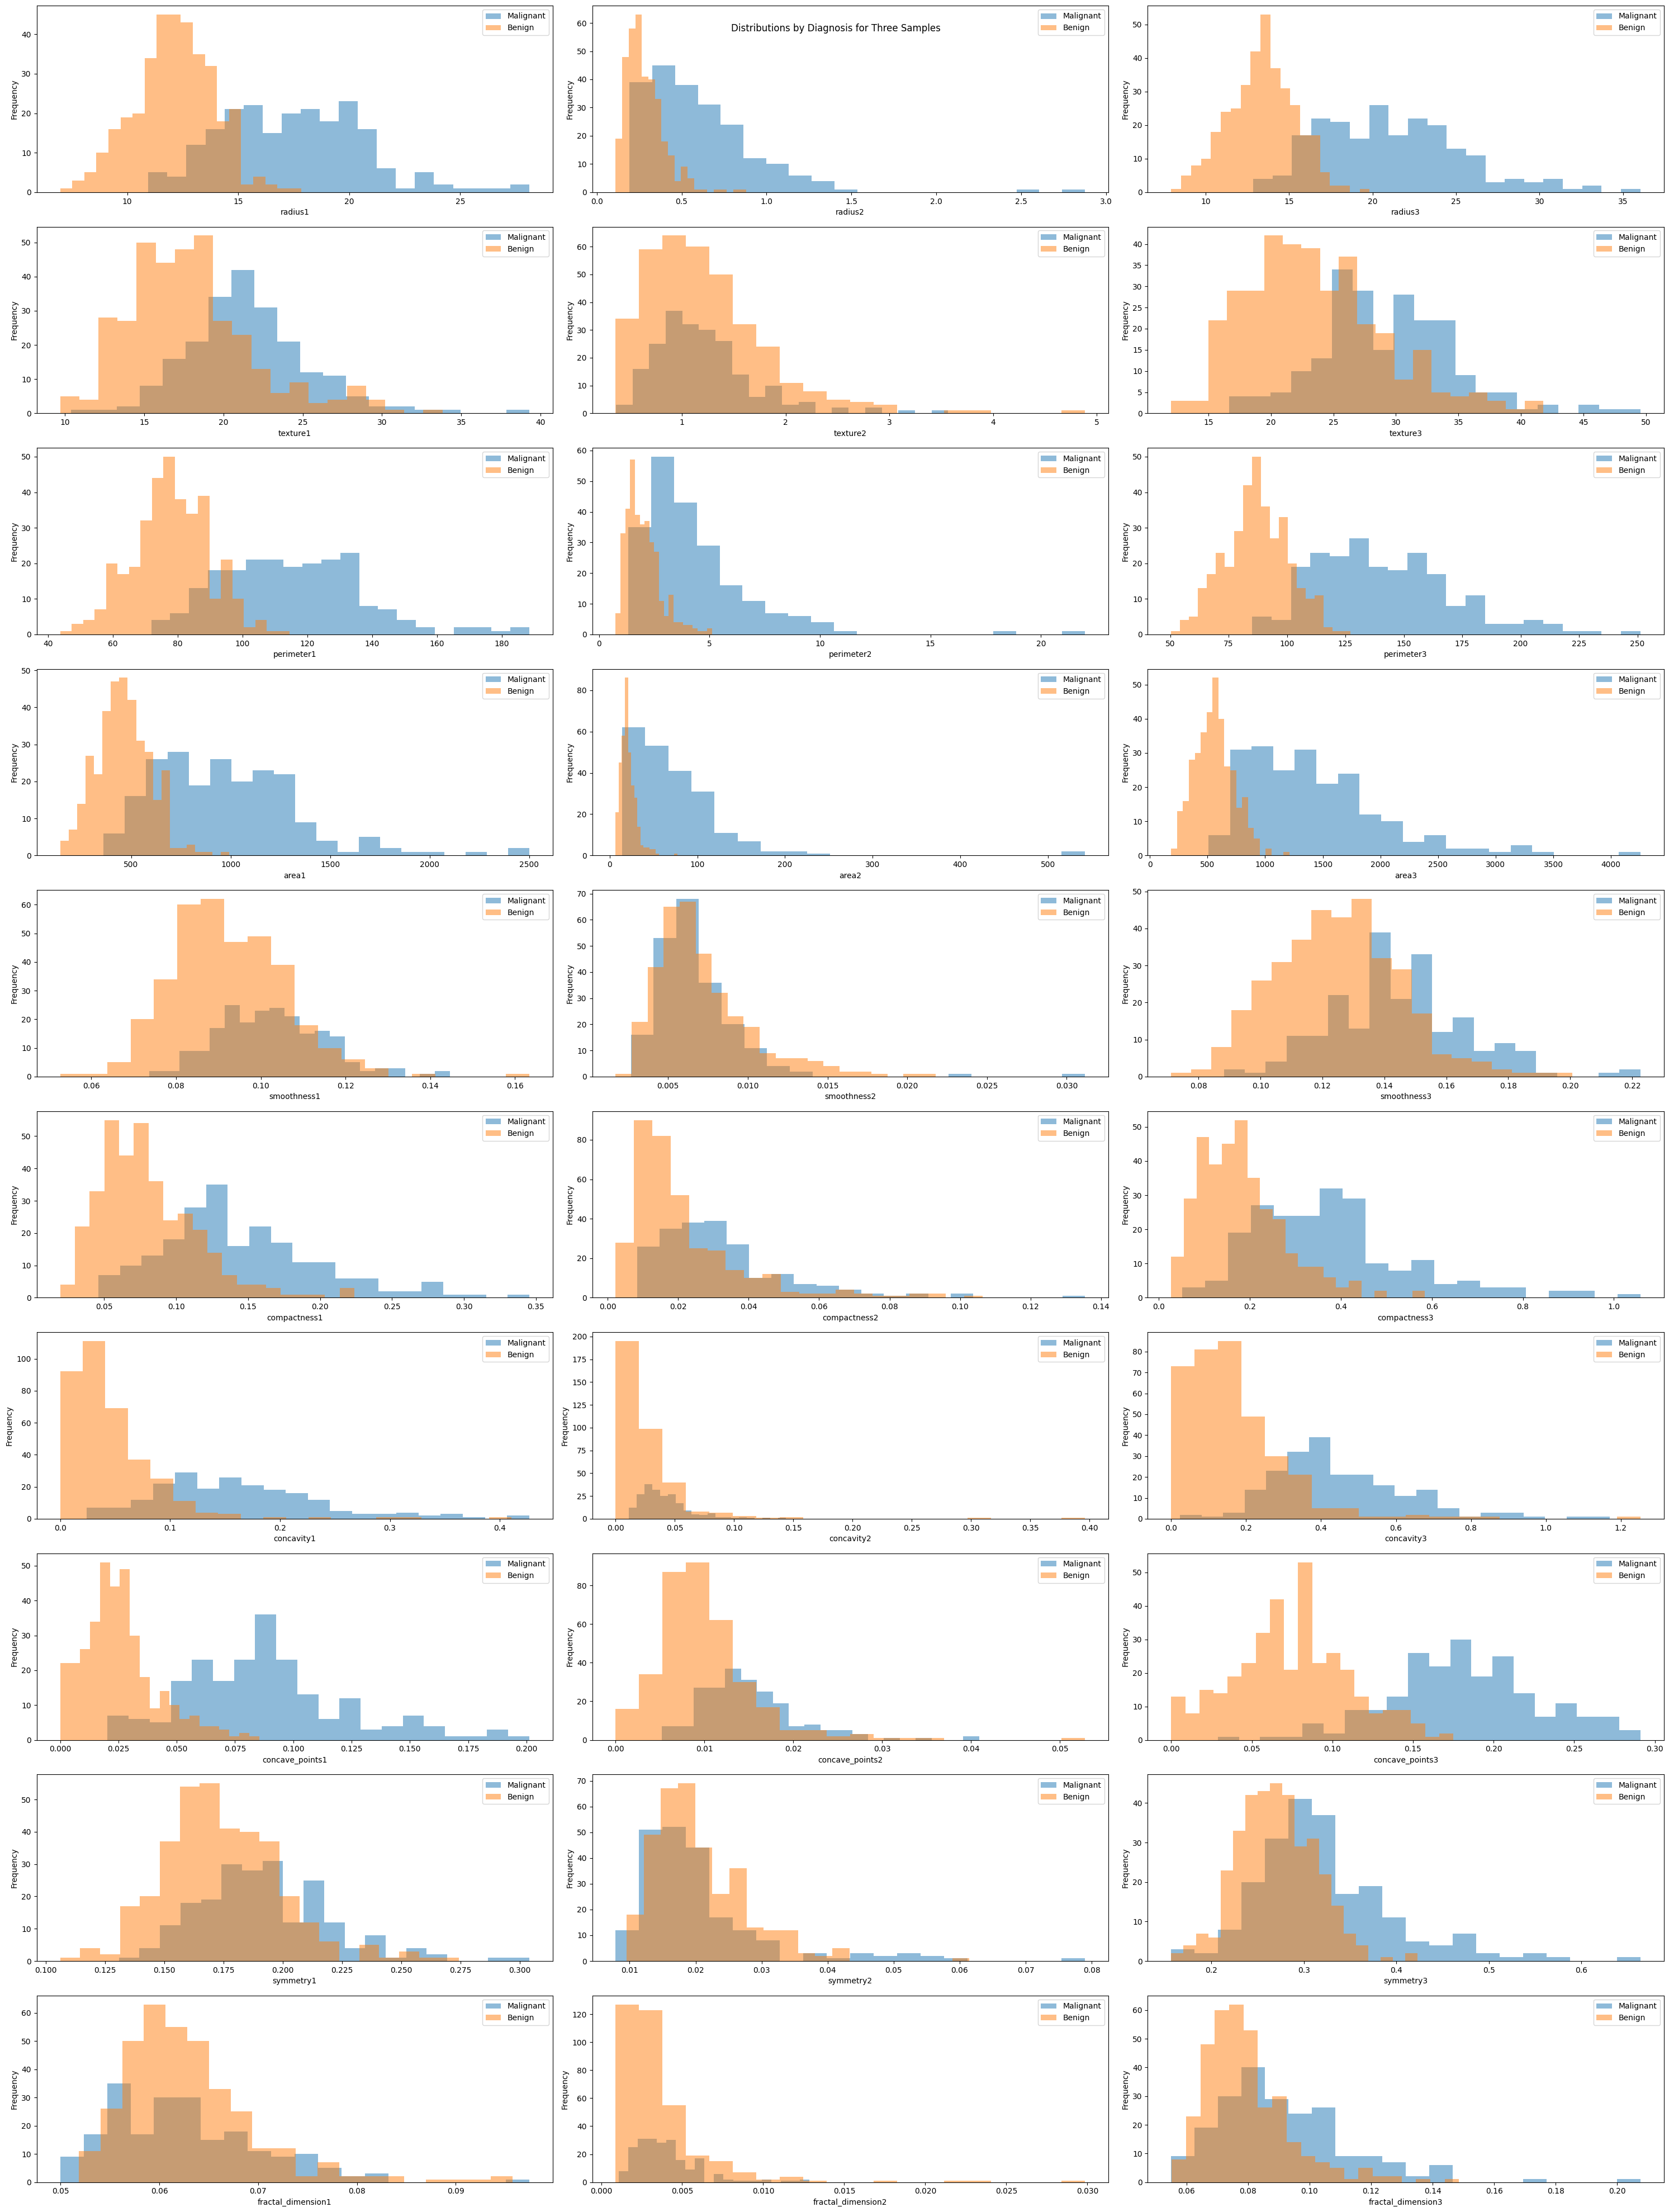

In [ ]:
# Create a figure with subplots for radius1, radius2, radius3
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 40),)
fig.suptitle('Distributions by Diagnosis for Three Samples')

sample_features = ['radius1', 'radius2', 'radius3', 'texture1', 'texture2', 'texture3',
                   'perimeter1', 'perimeter2', 'perimeter3', 'area1', 'area2', 'area3',
                   'smoothness1', 'smoothness2', 'smoothness3', 'compactness1', 'compactness2', 'compactness3',
                   'concavity1', 'concavity2', 'concavity3', 'concave_points1', 'concave_points2', 'concave_points3',
                   'symmetry1', 'symmetry2', 'symmetry3', 'fractal_dimension1', 'fractal_dimension2', 'fractal_dimension3']

# Iterate through features and create histograms for each subplot
for i, feature in enumerate(sample_features):
  row = i // 3
  col = i % 3
  ax = axes[row, col]

  ax.hist(X[feature][y == 'M'], alpha=0.5, label='Malignant', bins=20)
  ax.hist(X[feature][y == 'B'], alpha=0.5, label='Benign', bins=20)

  ax.set_xlabel(feature)
  ax.set_ylabel('Frequency')
  ax.legend()

plt.tight_layout()
plt.show()


<ipython-input-264-fc148e899029>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')


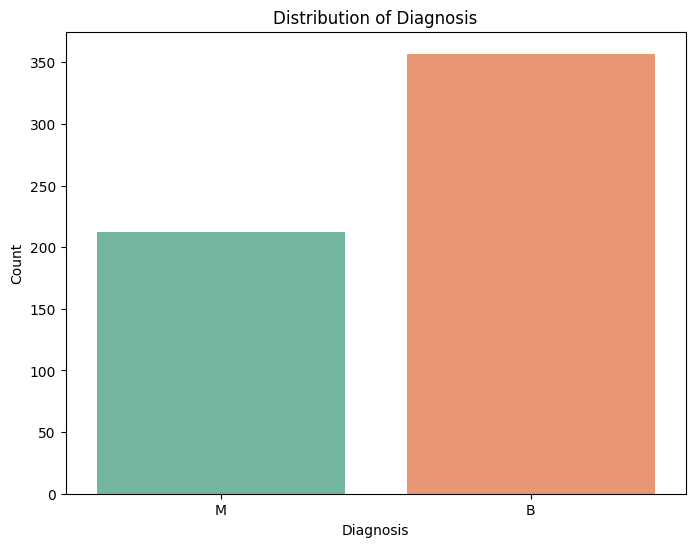

In [ ]:
# Create the distribution of Diagnosis

plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [ ]:
# Convert Diagnosis M and B to 1 and 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# **Data Distribution**

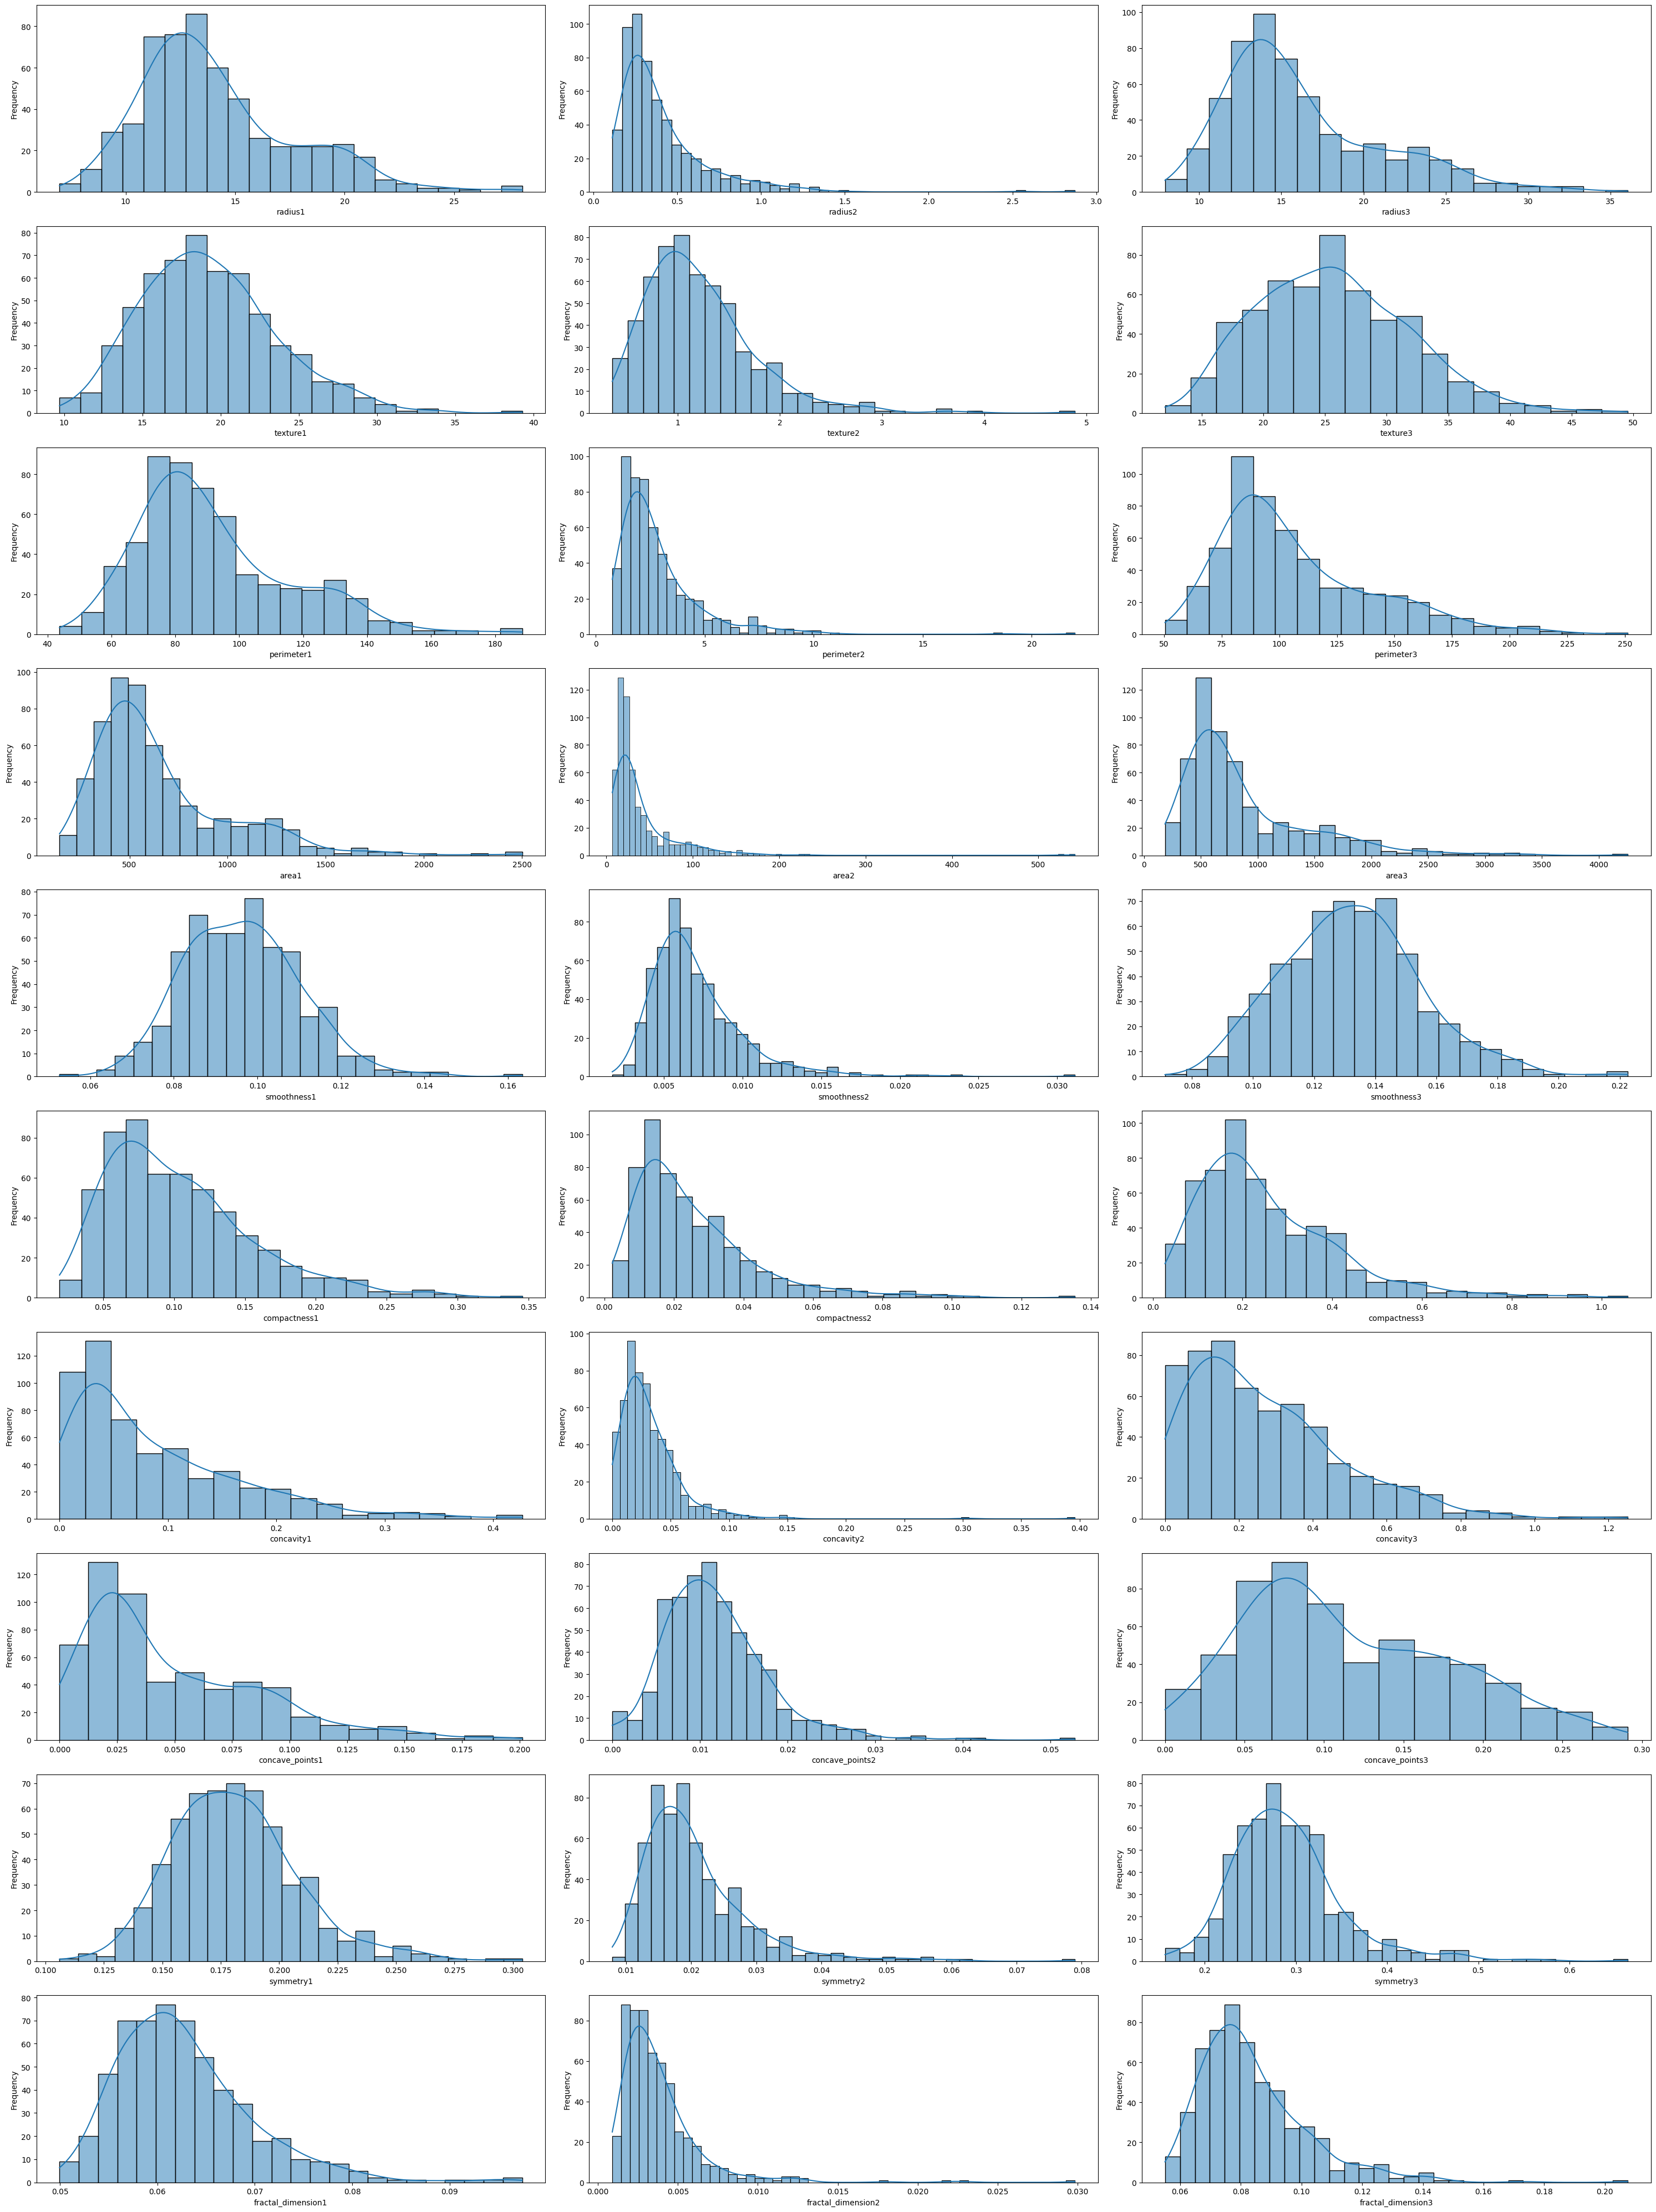

In [ ]:
# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 40))

# Iterate through features and create distribution plots for each subplot
for i, feature in enumerate(sample_features):
  row = i // 3
  col = i % 3
  ax = axes[row, col]

  sns.histplot(X[feature], kde=True, ax=ax)
  ax.set_xlabel(feature)
  ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()


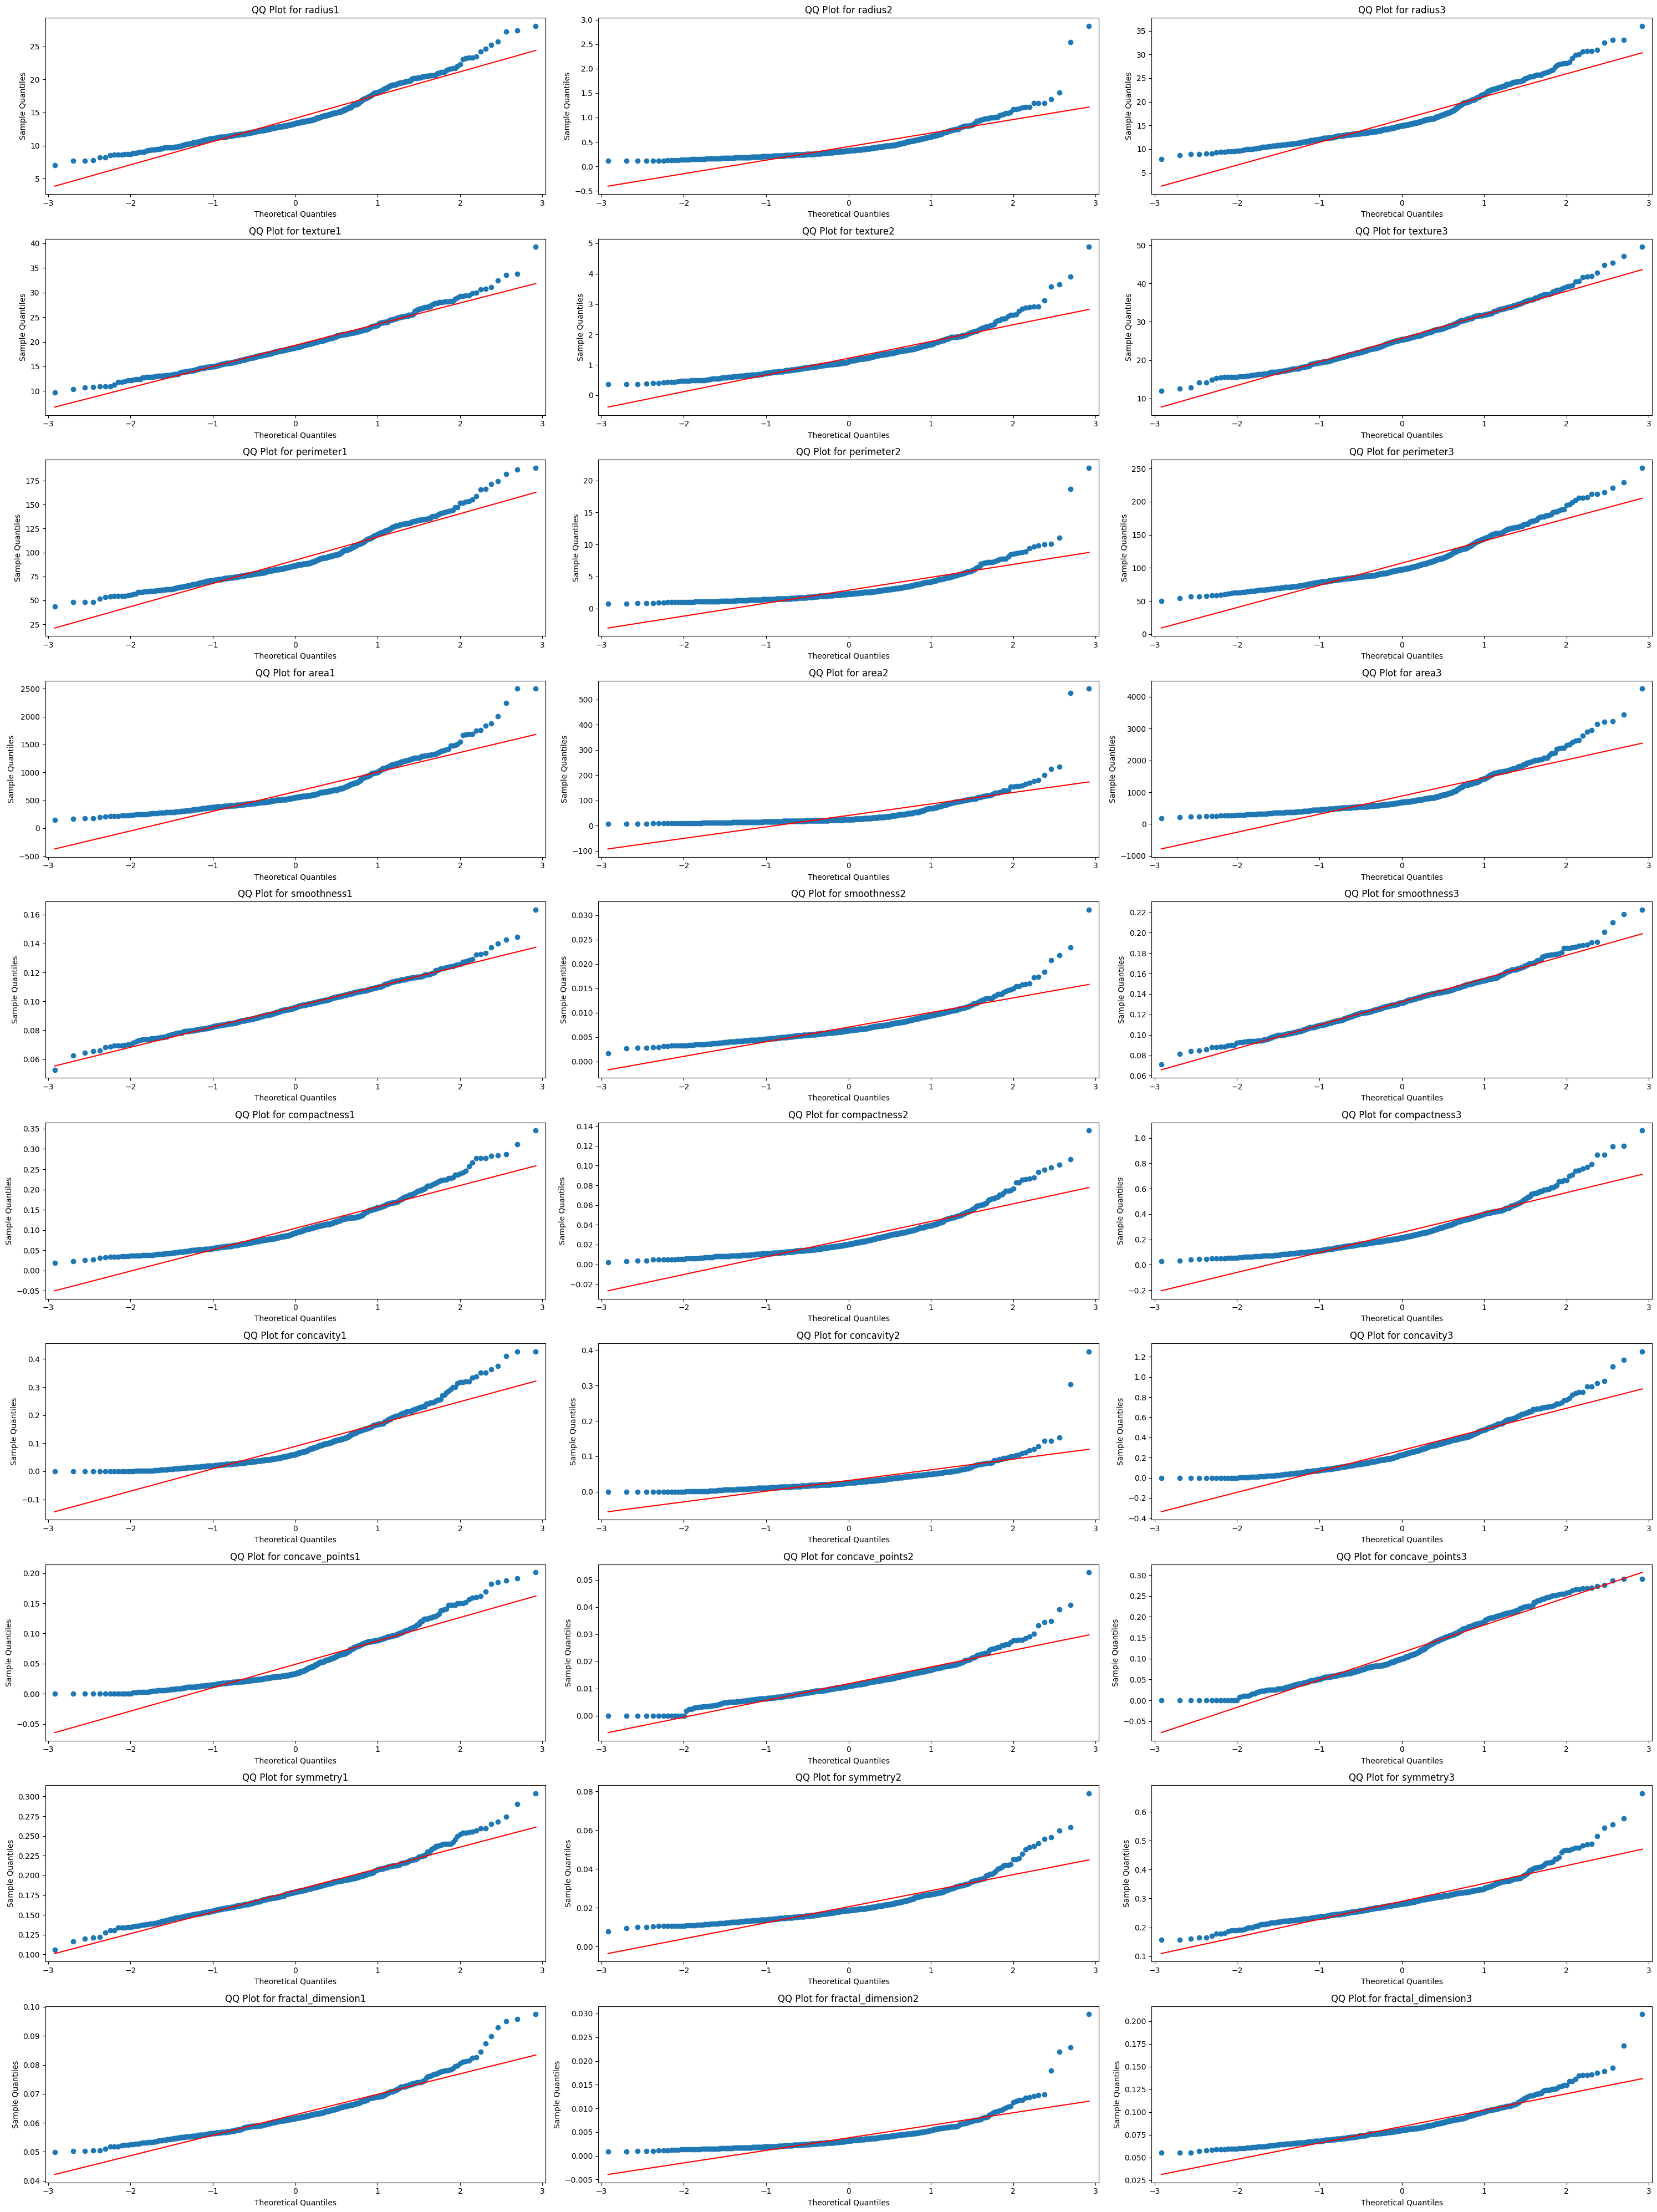

In [ ]:
# Create QQ plot

import statsmodels.api as sm

# Create QQ plots for selected features
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(30, 40))

for i, feature in enumerate(sample_features):
  row = i // 3
  col = i % 3
  ax = axes[row, col]

  sm.qqplot(X[feature], line='s', ax=ax)
  ax.set_title(f"QQ Plot for {feature}")

plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

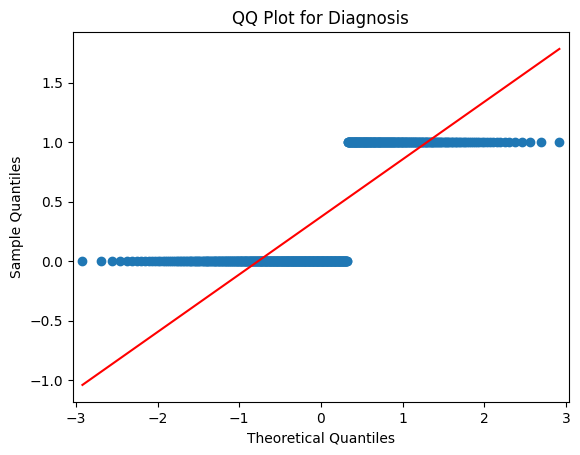

In [ ]:
plt.figure(figsize=(8, 6))
sm.qqplot(df['Diagnosis'], line='s')
plt.title("QQ Plot for Diagnosis")
plt.show()


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = df['Diagnosis']
X = df.drop('Diagnosis', axis=1)
X_sc = sc.fit_transform(X)


In [ ]:
X_sc = pd.DataFrame(X_sc, columns=X.columns)
X_sc.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


<Axes: >

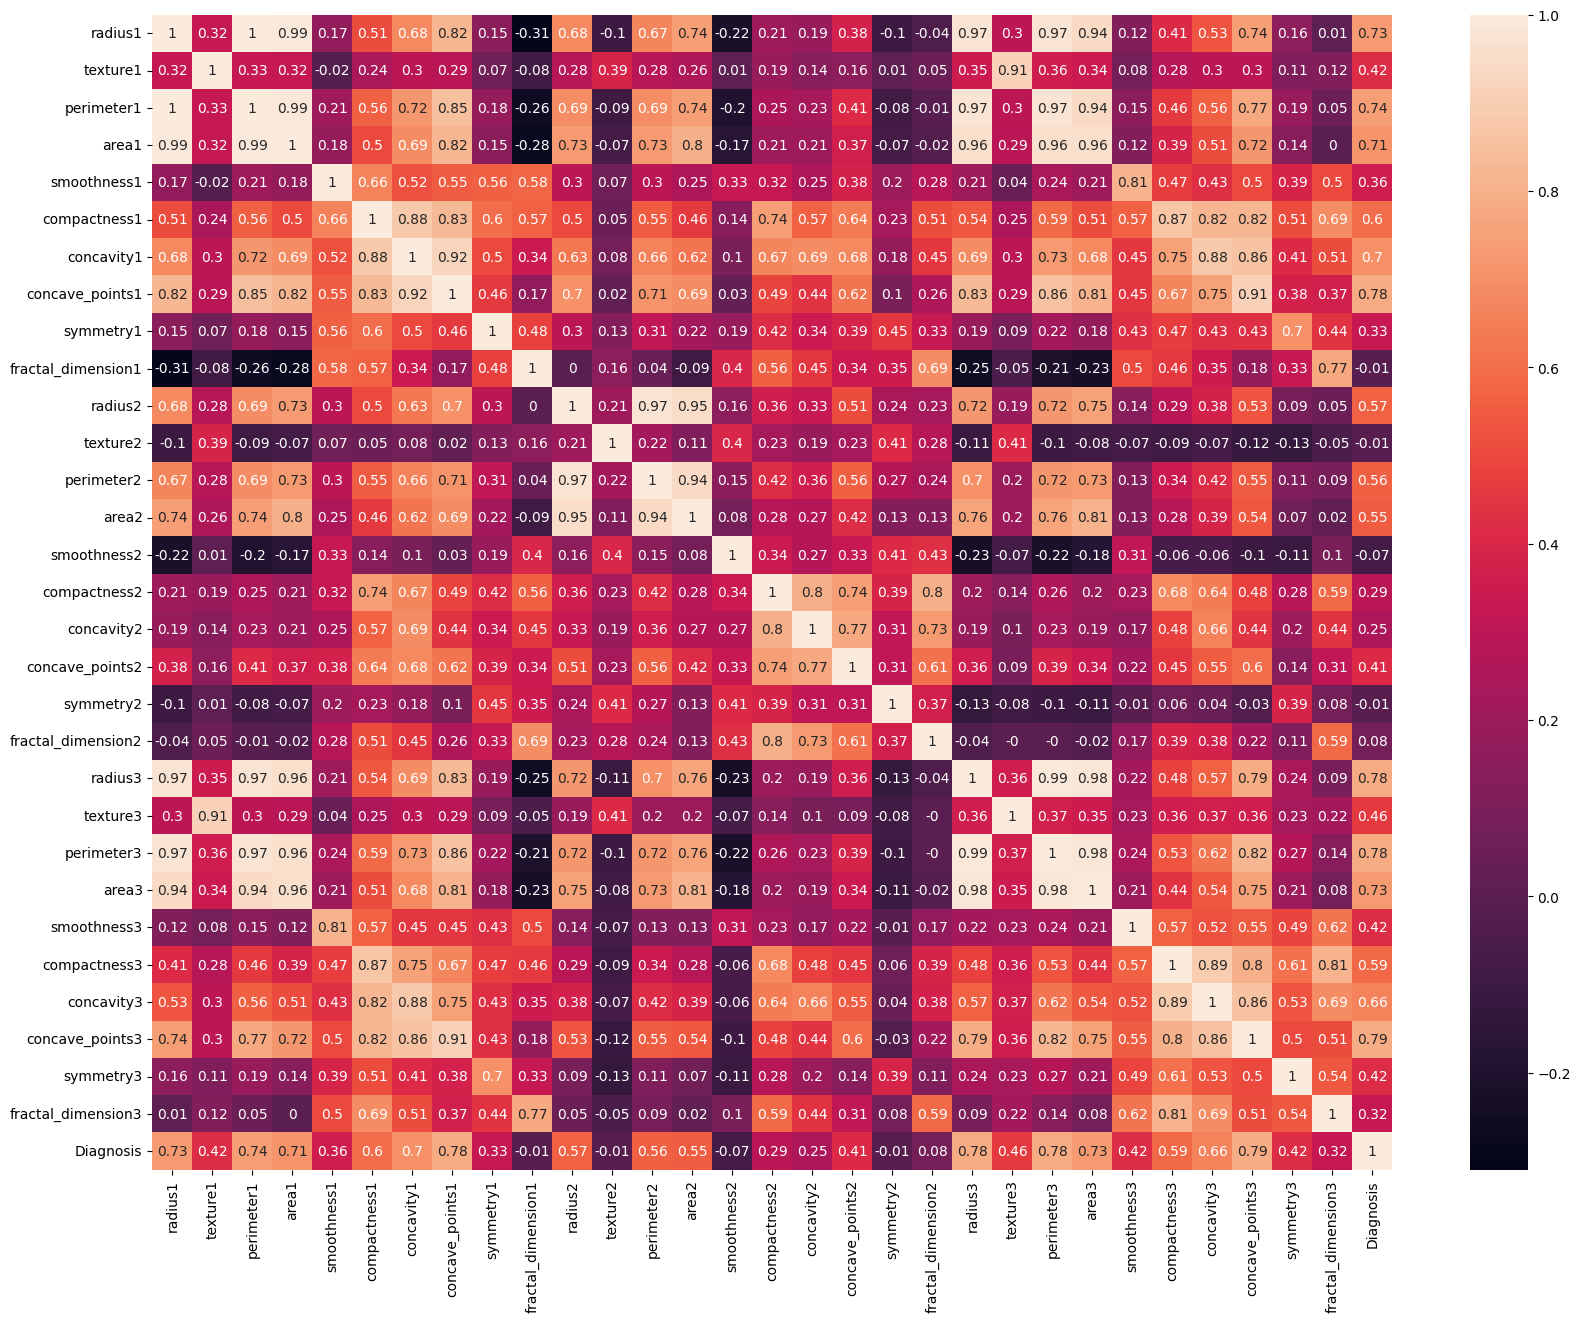

In [ ]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
correlation_matrix = df.corr()
correlation_with_quality = correlation_matrix['Diagnosis'].abs().sort_values(ascending=False)
top_variables = correlation_with_quality[1:11].index.tolist()
print(top_variables)

['concave_points3', 'perimeter3', 'concave_points1', 'radius3', 'perimeter1', 'area3', 'radius1', 'area1', 'concavity1', 'concavity3']


In [ ]:
df2 = df[['radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']]
df2.head()

,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<Axes: >

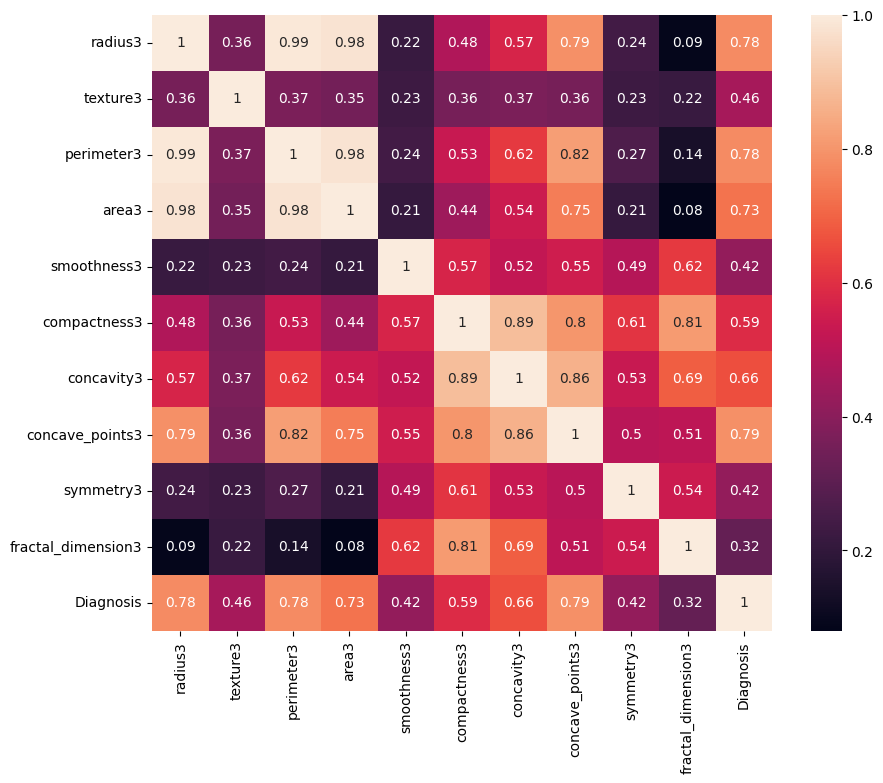

In [ ]:
correlation_matrix = df2.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True)

# **Plain Decision Tree Classifier / Regressor**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
correlation_matrix = df2.corr()
correlation_with_quality = correlation_matrix['Diagnosis'].abs().sort_values(ascending=False)
top_variables = correlation_with_quality[1:6].index.tolist()
print(top_variables)

['concave_points3', 'perimeter3', 'radius3', 'area3', 'concavity3']


In [ ]:
features = top_variables
X = df2[features]
y = df2['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
X_train.shape, X_test.shape

((398, 5), (171, 5))

In [ ]:
# Decision Tree Classifier
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
print(f"Decision Tree Best Parameters: {dt_grid.best_params_}")
print(f"Decision Tree Best Score: {dt_grid.best_score_}")

Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Best Score: 0.9547151898734176


In [ ]:
dt_best = dt_grid.best_estimator_
y_pred = dt_best.predict(X_test)

print("-------------------Decision Tree Model Report------------------------")

print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))

-------------------Decision Tree Model Report------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       108
           1       0.91      0.84      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Accuracy:  0.9122807017543859


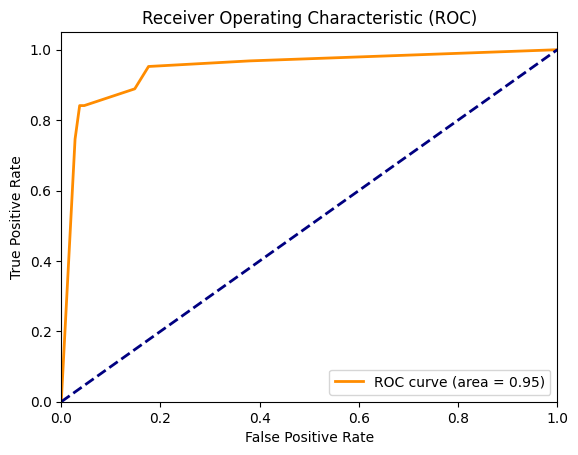

In [ ]:
# Decision Tree Plots: ROC and Precision-Recall curve

from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score

# Predict probabilities for the positive class
y_probs = dt_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

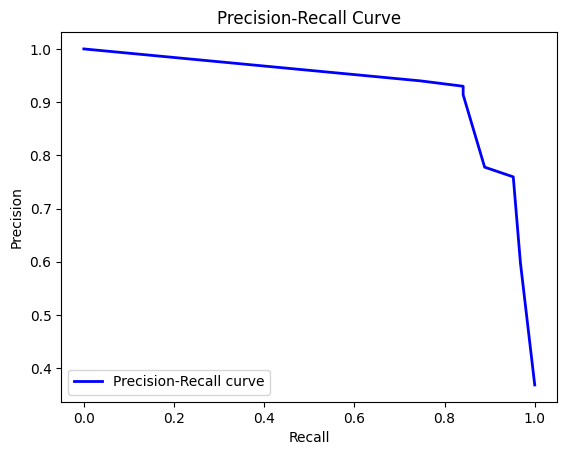

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

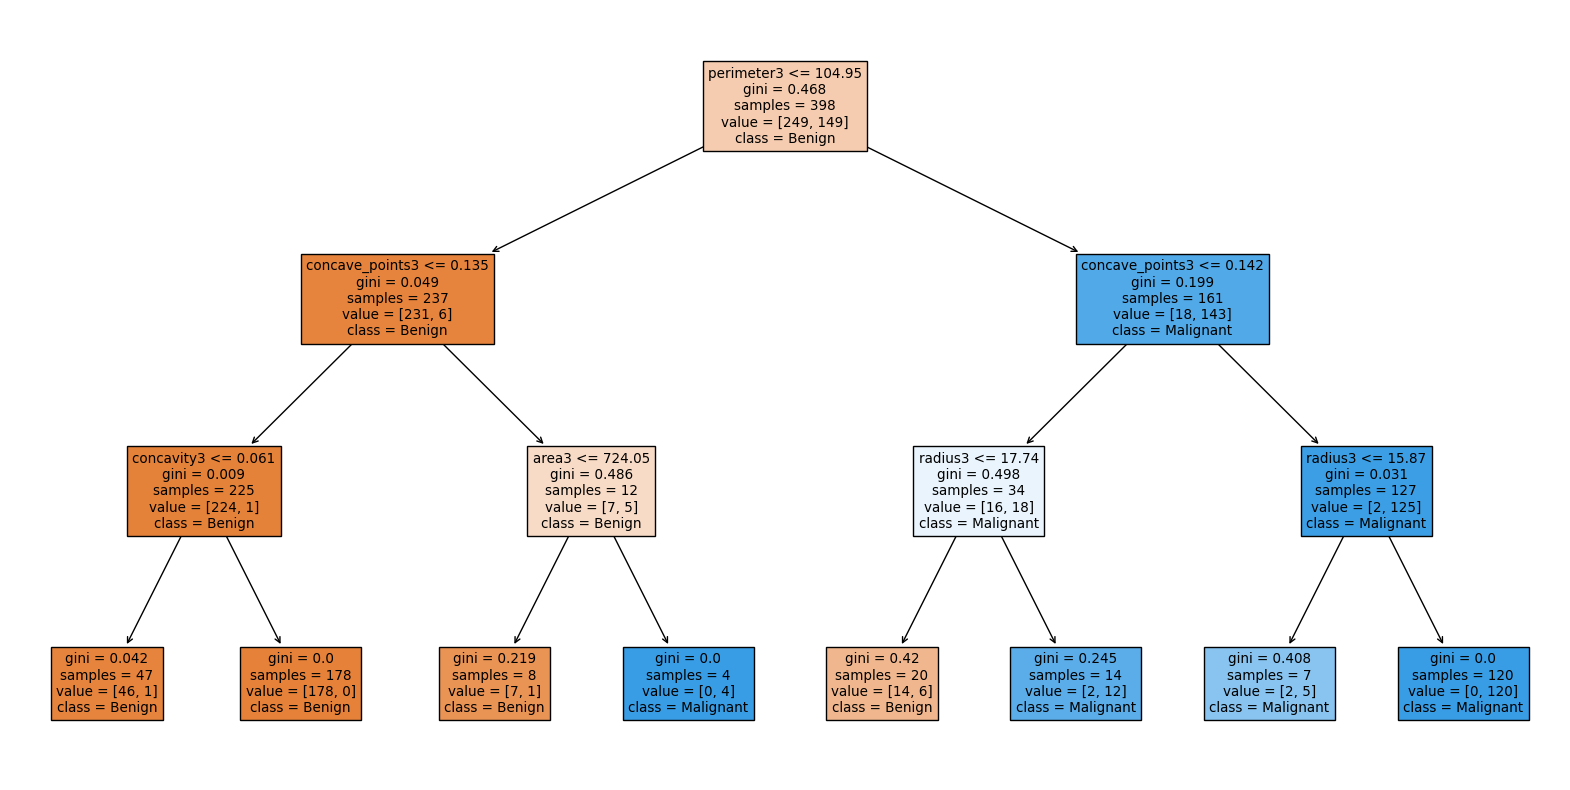

In [ ]:
# Visualize the decesion tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=features, class_names=['Benign', 'Malignant'], filled=True)
plt.show()


# **Random Forest Classifier / Regressor**

In [ ]:
# Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
print(f"Random Forest Best Parameters: {rf_grid.best_params_}")
print(f"Random Forest Best Score: {rf_grid.best_score_}")

Random Forest Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Score: 0.9472468354430381


In [ ]:
rf_best = rf_grid.best_estimator_
y_pred = rf_best.predict(X_test)

print("-------------------Random Forest Model Report------------------------")

print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))

-------------------Random Forest Model Report------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy:  0.935672514619883


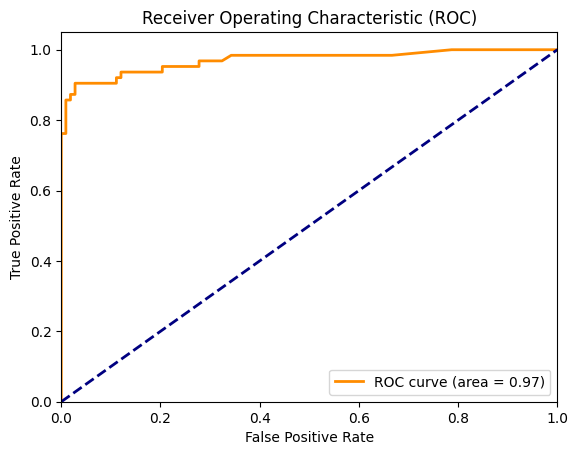

In [ ]:
# Random Forest Plots: ROC and Precision-Recall curve

# Predict probabilities for the positive class
y_probs = rf_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

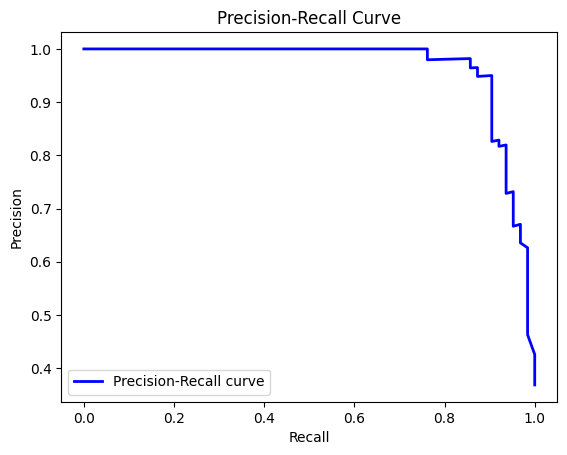

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'get_dump'

<Figure size 2000x1000 with 0 Axes>

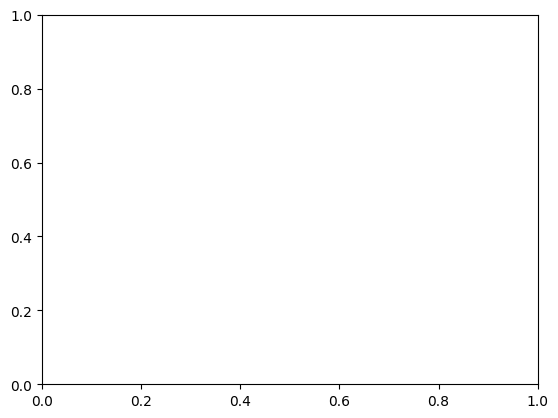

In [ ]:
# Visualize the ramdom forest

# Select a single tree from the forest for visualization
tree_to_visualize = rf_best.estimators_[0]  # You can change the index to see different trees

plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=features, class_names=['1', '0'], filled=True)
plt.show()


# **AdaBoost Classifier / Regressor**

In [ ]:
# AdaBoost Classifier
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

ada = AdaBoostClassifier()
ada_grid = GridSearchCV(ada, ada_params, cv=5)
ada_grid.fit(X_train, y_train)
print(f"AdaBoost Best Parameters: {ada_grid.best_params_}")
print(f"AdaBoost Best Score: {ada_grid.best_score_}")

AdaBoost Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoost Best Score: 0.952246835443038


In [ ]:
ada_best = ada_grid.best_estimator_
y_pred = ada_best.predict(X_test)

print("-------------------Adaboost Model Report------------------------")

print(classification_report(y_test,y_pred))
print("Accuracy = " + str(accuracy_score(y_test, y_pred)))

-------------------Adaboost Model Report------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy = 0.9532163742690059


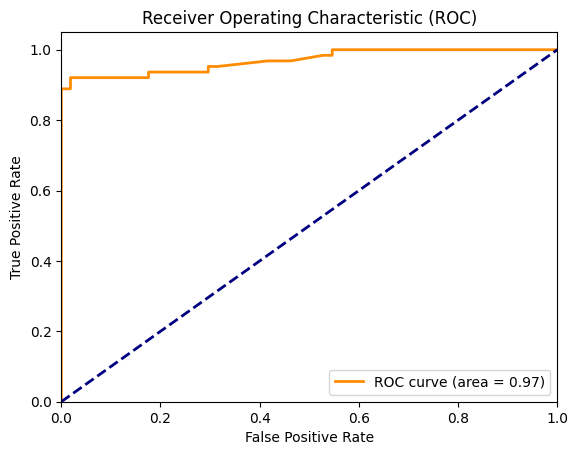

In [ ]:
# Adaboost Plots: ROC and Precision-Recall curve
# Predict probabilities for the positive class
y_probs = ada_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

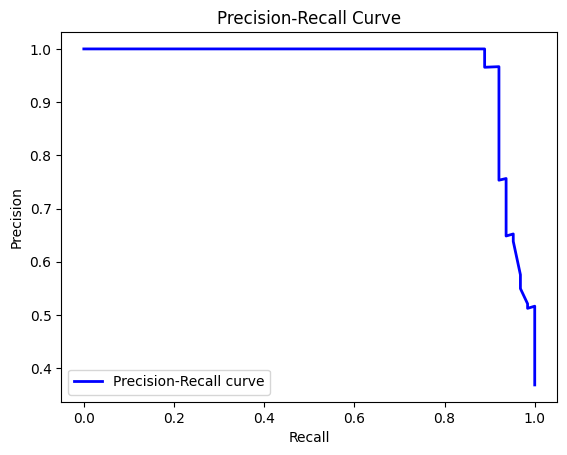

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

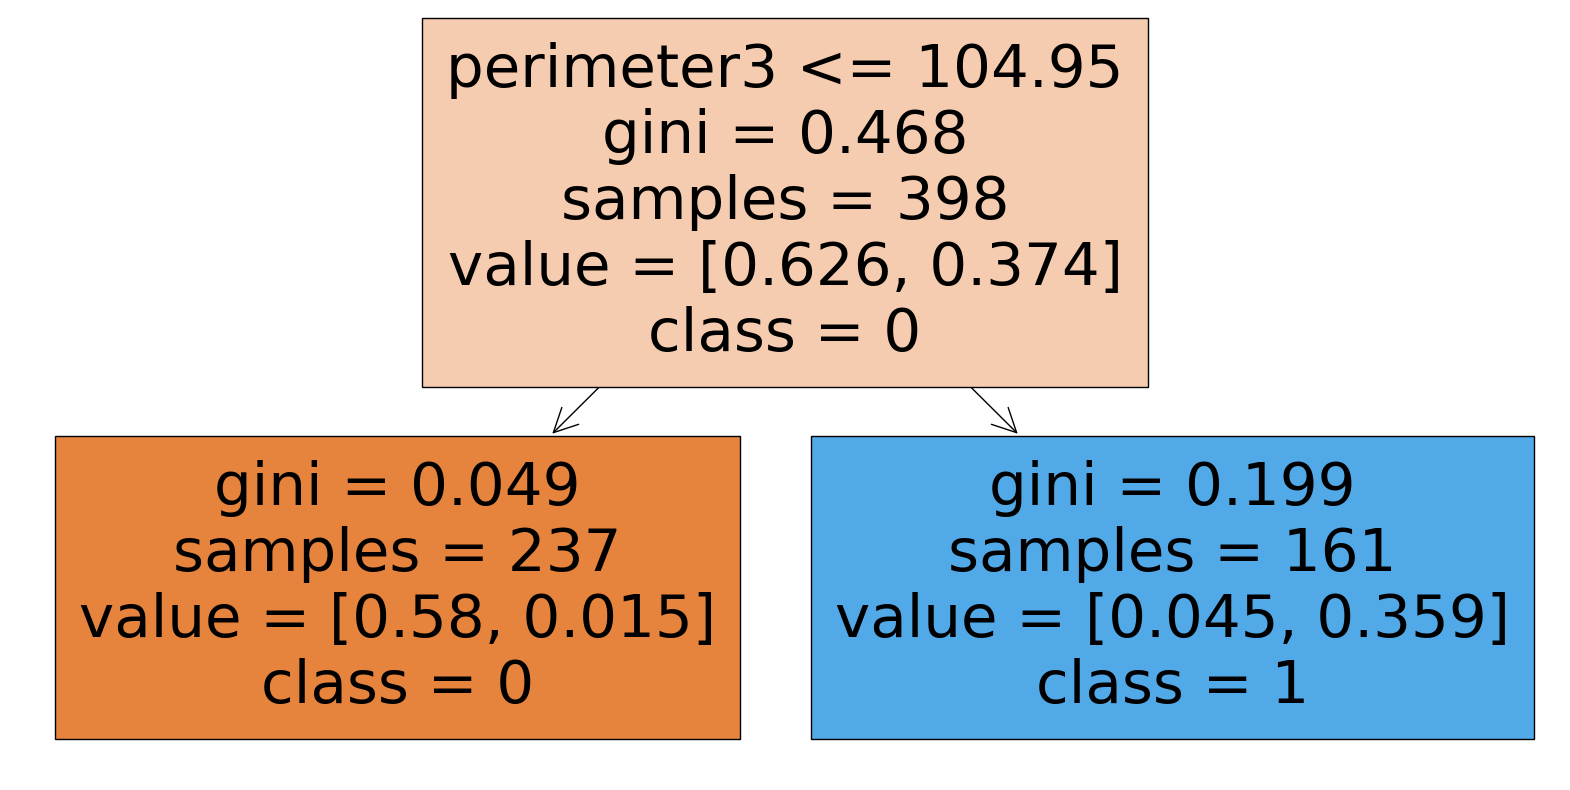

In [ ]:
# prompt: visualize the adaboost, stop in the best estimator

# Select a single estimator (Decision Tree) from the AdaBoost model for visualization
estimator_to_visualize = ada_best.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator_to_visualize, feature_names=features, class_names=['0', '1'], filled=True)
plt.show()


# **XGBoost Classifier / Regressor**

In [ ]:
!pip install xgboost
import xgboost as xgb

In [ ]:
# XGBoost Classifier
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
print(f"XGBoost Best Parameters: {xgb_grid.best_params_}")
print(f"XGBoost Best Score: {xgb_grid.best_score_}")

XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
XGBoost Best Score: 0.949746835443038


In [ ]:
xgb_best = xgb_grid.best_estimator_
y_pred = xgb_best.predict(X_test)

print("-------------------XGBoost Model Report------------------------")

print(classification_report(y_test, y_pred))
print('Accuracy: ',accuracy_score(y_test, y_pred))

-------------------XGBoost Model Report------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.87      0.87      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Accuracy:  0.9064327485380117


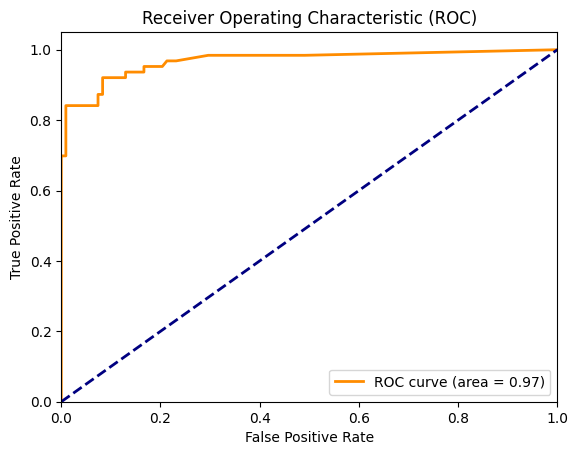

In [ ]:
# XGBoost Plots: ROC and Precision-Recall curve

# Predict probabilities for the positive class
y_probs = xgb_best.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

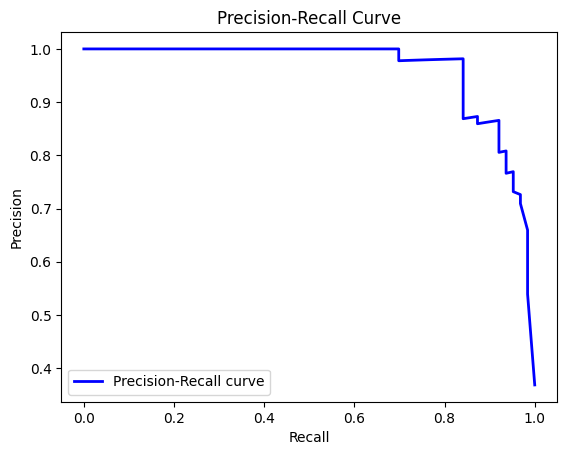

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

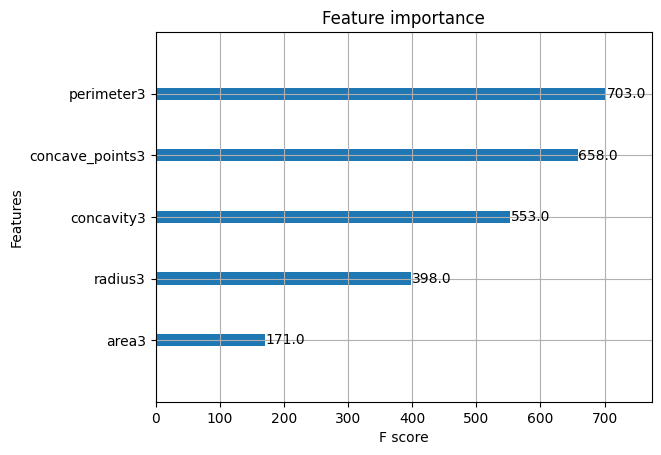

In [ ]:
visualize the xgb
plot_importance(xgb_best)
plt.show()
